In [35]:
# Standard includes
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

In [30]:
# Import diabetes data (n = 442)
data = np.genfromtxt('diabetes-data.csv', delimiter=',')
n,d = data.shape
# Features: 
# 0 = age, 1 = sex, 2 = body mass index, 3 = average blood pressure, 4-9 = six blood serum measurements
# 10 = y (a quantitative measure of disease progression one year after baseline)
features = ['age', 'sex', 'body mass index', 'blood pressure', 'serum1', 'serum2', 'serum3', 'serum4', 'serum5', 'serum6']
# We are interested in 0 and 2; let's start with a scatterplot
x = data[:,0:10] # predictors
y = data[:,10] # response variable

In [31]:
# Look at response variable y on its own: what is its variance?
np.mean(y), np.var(y)

(152.13348416289594, 5929.8848969103828)

('Coefficients, intercept: ', array([ 10.23312787]), -117.77336656656527)
Mean squared error: 3890.46


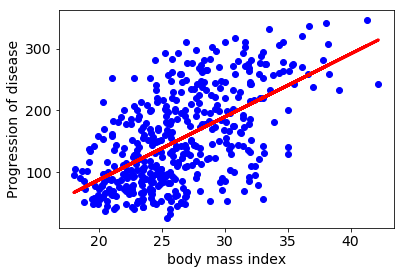

In [33]:
# Now regress y on a single feature of x
f = [2]
regr = linear_model.LinearRegression()
xf = x[:,f]
regr.fit(xf, y)

# Print coefficients
print('Coefficients, intercept: ', regr.coef_, regr.intercept_)

# Make predictions using the model and compute squared error
y_pred = regr.predict(xf)
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))

# Plot outputs
plt.plot(xf[:,0], y, 'bo')
plt.plot(xf[:,0], y_pred, 'r-', linewidth=3)
plt.xlabel(features[f[0]], fontsize=14)
plt.ylabel('Progression of disease', fontsize=14)
plt.show()

('Coefficients, intercept: ', array([  7.27600054,  56.05638703]), -299.95751508023625)
Mean squared error: 3205.19


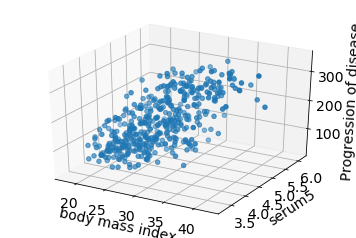

In [38]:
# Next, regress on a pair of features
f = [2,8]
regr = linear_model.LinearRegression()
xf = x[:,f]
regr.fit(xf, y)

# Print coefficients
print('Coefficients, intercept: ', regr.coef_, regr.intercept_)

# Make predictions using the model and compute squared error
y_pred = regr.predict(xf)
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))

# Plot outputs
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel(features[f[0]], fontsize=14)
ax.set_ylabel(features[f[1]], fontsize=14)
ax.set_zlabel('Progression of disease', fontsize=14)    
ax.scatter(xf[:,0], xf[:,1], y, 'bo')
plt.show()
#plt.plot(xf[:,0], y_pred, 'r-', linewidth=3)


In [32]:
# Now regress y on the full set of features x
regr = linear_model.LinearRegression()
regr.fit(x, y)

# Print coefficients
print('Slope, intercept: ', regr.coef_, regr.intercept_)

# Make predictions using the model and compute squared error
y_pred = regr.predict(x)
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))

# Plot outputs
#plt.plot(x, y, 'bo')
#plt.plot(x, y_pred, 'r-', linewidth=3)

('Slope, intercept: ', array([ -3.63612242e-02,  -2.28596481e+01,   5.60296209e+00,
         1.11680799e+00,  -1.08999633e+00,   7.46450456e-01,
         3.72004715e-01,   6.53383194e+00,   6.84831250e+01,
         2.80116989e-01]), -334.56713851878771)
Mean squared error: 2859.70
